### 1. Find the url for the California Test Score Data Set from the following website:

https://vincentarelbundock.github.io/Rdatasets/datasets.html

Read through the "DOC" file to understand the variables in the dataset, then use the following url to import the data.  

https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv

The target data (i.e. the dependent variable) is named "testscr".  You can use all  variables in the data except for "readscr" and "mathscr" in the following analysis.  (These two variables were used to generate the dependent variable).

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")

### 1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.   



In [3]:
data.head()

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


In [4]:
ca_schools = data.drop(['readscr','mathscr','distcod'], axis=1)
ca_schools.head()

,Unnamed: 0,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct
0,1,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000
1,2,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333
2,3,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002
3,4,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000
4,5,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677


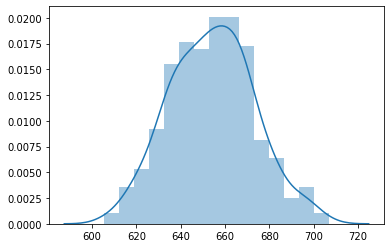

In [5]:
#Univariate Distribution: Test Scores 
df_test = pd.DataFrame(ca_schools, columns=["testscr"])
df_test
sns.distplot(df_test)

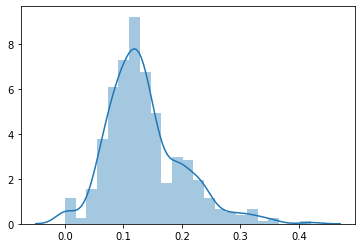

In [6]:
#Univariate Distribution: Computers Per Student 
df_comp = pd.DataFrame(ca_schools, columns=["compstu"])
df_comp
sns.distplot(df_comp)

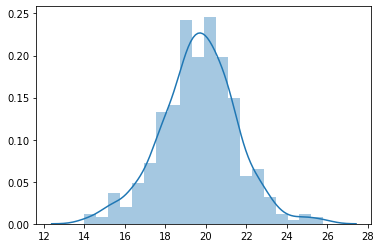

In [7]:
#Univariate Distribution: Student/Teacher Ratio 
df_str = pd.DataFrame(ca_schools, columns=["str"])
df_str
sns.distplot(df_str)

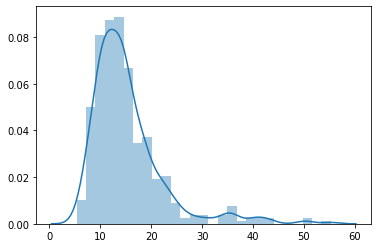

In [8]:
#Univariate Distribution: Average Income
df_inc = pd.DataFrame(ca_schools, columns=["avginc"])
df_inc
sns.distplot(df_inc)

### 1.2 Visualize the dependency of the target on each feature from 1.1.

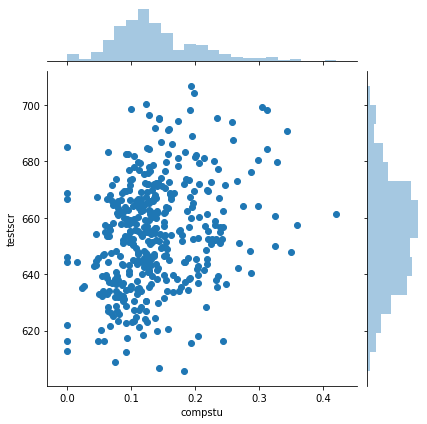

In [9]:
sns.jointplot(x="compstu", y="testscr", data=ca_schools)

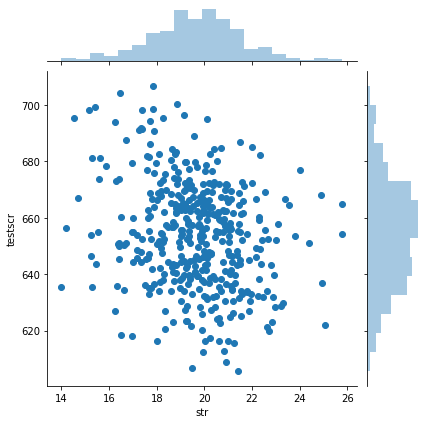

In [10]:
sns.jointplot(x="str", y="testscr", data=ca_schools)

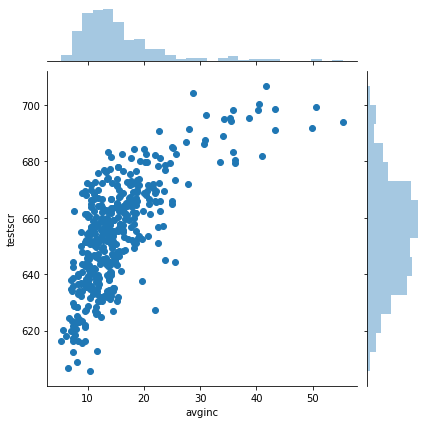

In [11]:
sns.jointplot(x="avginc", y="testscr", data=ca_schools)

### 1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?

#### Split data in training and test set

In [32]:
y = ca_schools['testscr']
y=y.astype("int64")

In [33]:
X = ca_schools.drop(['Unnamed: 0', 'county', 'district','grspan','testscr'], axis=1)


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [35]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
skfold = StratifiedKFold(n_splits=5, shuffle=True)
rkf = RepeatedKFold(n_splits=5, n_repeats=10)

### KNN for Regression

In [17]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)


print("R^2: {:.2f}".format(knn.score(X_test, y_test)))

y_pred = knn.predict(X_test)

R^2: 0.04


#### KNN for Regression w/ Scaled Data

In [18]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

print("R^2: {:.2f}".format(knn.score(X_test_scaled, y_test)))


R^2: 0.69


Scaling the data using the Standard Scalar, which standardizes by calculating a standard score. This score is calculated through the use of the following formula: z = (x-u)/s. Where z is the score, x is the unit to be standardized u is the mean of the data samples and s is their standard deviation. In the case of KNN Regression standardizing the data has produced a model with greater explanatory power, as we can see an increase in R^2 from 0.04 to 0.69 suggesting that when standardized 69% of the variation in y can be explained by x, where only 4% can be explained given no standardization.


Sources: 
1. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
2. QMSSGR5073 'Preprocessing Data.ipynb', "Using StandardScaler()

#### KNN for Regression Cross Validation

In [44]:
#Empty space in regressor assumes n_neighbors = 5

print("KFold Mean:\n{}".format(
cross_val_score(KNeighborsRegressor(), X, y, cv=kfold).mean()))

print("StratifiedKFold Mean:\n{}".format(
cross_val_score(KNeighborsRegressor(), X, y, cv=skfold).mean()))

print("RepeatedKFold Mean:\n{}".format(
cross_val_score(KNeighborsRegressor(), X, y, cv=rkf).mean()))


KFold Mean:
-16.071366760448093
StratifiedKFold Mean:
0.01232438589727749
RepeatedKFold Mean:
-0.017588968334293246


We see that when apply different types of cross-validation, holding the n_ neighbors  constant, we get back some negative scores (these scores equate to the average R^2 for the runs of cross validation) Upon running the model with the test and train data the negatives went away, however no examples on scikit or the notes suggest using the split data. Found examples use the data as a whole separated by X (independent variables) and y (dependent variables). As a result, the previous cell was provided, despite the negative measure of R^2. Do note the stratified KFold mean is positive, which appears to suggest that we can get some small positive explanatory power by ensuring that each fold has the same proportion of observations. 

Sources:
1. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross_val_score#sklearn.model_selection.cross_val_score
2. QMSSGR5073 "Knn_CV_and_Model_Tuning.ipynb, 'Using Cross validation for model evaluation'"

3. https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85

### Linear Regression (OLS)

In [45]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

#### Linear Regression (OLS) w/ Non-Scaled Data

In [47]:
lr = LinearRegression().fit(X_train, y_train)

In [48]:
X_train_new = sm.add_constant(X_train) 
model = sm.OLS(y_train, X_train_new ).fit() 

model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     125.5
Date:                Mon, 02 Mar 2020   Prob (F-statistic):          1.24e-101
Time:                        11:32:12   Log-Likelihood:                -1099.0
No. Observations:                 315   AIC:                             2220.
Df Residuals:                     304   BIC:                             2261.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        663.1277     10.936     60.635      0.000     641.607     684.648
enrltot        0.0002      0.002      0.095      0.924      -0.003       0.004
teachers      -0.0080      0.038     -0.208      0.835      -0.083       0.067
calwpct       -0.1048      0.068     -1.542      0.124      -0.239       0.029
mealpct       -0.3639      0.042     -8.745      0.000      -0.446      -0.282
computer       0.0022      0.003      0.661      0.509      -0.004       0.009
compstu       -1.3673      8.528     -0.160      0.873     -18.149      15.415
expnstu        0.0019      0.001      1.911      0.057   -5.65e-05       0.004
str           -0.3460      0.367     -0.942      0.347      -1.069       0.377
avginc         0.5201      0.096      5.395      0.000       0.330       0.710
elpct         -0.1963      0.042     -4.681      0.000      -0.279      -0.114
==============================================================================
Omnibus:                        1.564   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.457   Jarque-Bera (JB):                1.377
Skew:                           0.016   Prob(JB):                        0.502
Kurtosis:                       3.322   Cond. No.                     1.58e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Linear Regression w/ Scaled Data 

In [49]:
X_train_new = sm.add_constant(X_train_scaled) 
model = sm.OLS(y_train, X_train_new).fit() 

model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.2893
Date:                Mon, 02 Mar 2020   Prob (F-statistic):              0.983
Time:                        11:32:27   Log-Likelihood:                -1354.9
No. Observations:                 315   AIC:                             2732.
Df Residuals:                     304   BIC:                             2773.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        653.8063      1.024    638.376      0.000     651.791     655.822
x1             5.5483     15.980      0.347      0.729     -25.898      36.995
x2            -5.8866     17.138     -0.343      0.731     -39.610      27.837
x3            -0.1447      1.728     -0.084      0.933      -3.544       3.255
x4            -1.4030      2.539     -0.552      0.581      -6.400       3.594
x5             0.6326      3.486      0.181      0.856      -6.226       7.492
x6            -0.1151      1.241     -0.093      0.926      -2.557       2.326
x7             0.7187      1.429      0.503      0.615      -2.093       3.531
x8            -0.1529      1.539     -0.099      0.921      -3.182       2.876
x9            -1.3574      1.577     -0.861      0.390      -4.460       1.745
x10            1.8683      1.669      1.119      0.264      -1.417       5.153
==============================================================================
Omnibus:                        0.609   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.713
Skew:                           0.011   Prob(JB):                        0.700
Kurtosis:                       2.768   Cond. No.                         43.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the case of Linear Regression, scaling the data has a negative impact on the explanatory power of the model. We see some changes in the size of the coefficients, and the decrease of t-stats, which suggest the variables should not be included in the model, as one cannot reject the null hypothesis that the independent variables explain nothing with regard to our y (dependent variable).

#### Linear Regression Cross Validation

In [53]:
print("KFold:\n{}".format(
cross_val_score(LinearRegression(), X, y, cv=kfold).mean()))

print("StratifiedKFold:\n{}".format(
cross_val_score(LinearRegression(), X, y, cv=skfold).mean()))

print("RepeatedKFold:\n{}".format(
cross_val_score(LinearRegression(), X, y, cv=rkf).mean()))



KFold:
-4.379031971136683
StratifiedKFold:
0.80008382405661
RepeatedKFold:
0.7926505547400525


We see that when apply different types of cross-validation we get back a negative score from KFold. Cross Validation through Stratified Kfold and Repeated Kfold suggest that the independent variables in the linear regression can explain 80% of the variation in our dependent variable. 

### Ridge Regression 

In [54]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV


#### Ridge Regression w/ Non-Scaled Data

In [65]:
ridge = Ridge().fit(X_train, y_train)
print("Training R^2: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test R^2: {:.2f}".format(ridge.score(X_test, y_test)))

Training R^2: 0.80
Test R^2: 0.81


#### Ridge Regression w/ Scaled Data

In [62]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [64]:
ridge = Ridge().fit(X_train_scaled, y_train) 
print("Training R^2: {:.2f}".format(ridge.score(X_train_scaled, y_train)))
print("Test R^2: {:.2f}".format(ridge.score(X_test_scaled, y_test))) 

Training R^2: 0.80
Test R^2: 0.81


This ridge regression does not seem to experience a change in explanatory power given the scaled data. 

#### Ridge Regression Cross Validaion

In [66]:
print("KFold:\n{}".format(
cross_val_score(Ridge(), X, y, cv=kfold).mean()))

print("StratifiedKFold:\n{}".format(
cross_val_score(Ridge(), X, y, cv=skfold).mean()))

print("RepeatedKFold:\n{}".format(
cross_val_score(Ridge(), X, y, cv=rkf).mean()))



KFold:
-4.3006576536144925
StratifiedKFold:
0.8047688959618053
RepeatedKFold:
0.7917275577377194


We see that when apply different types of cross-validation we get back a negative score from KFold. Cross Validation through Stratified Kfold and Repeated Kfold suggest that the independent variables in the ridge regression can explain roughly 80% of the variation in our dependent variable.

### Lasso Regression 

#### Lasso Regression w/ Non-Scaled Data

In [68]:
from sklearn.linear_model import Lasso

In [69]:
lasso = Lasso().fit(X_train, y_train)
print("Training R^2: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test R^2: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0))) 
#print("lasso.coef_: {}".format(lasso.coef_))

Training R^2: 0.80
Test R^2: 0.81
Number of features used: 8


#### Lasso Regressoion w/ Scaled Data

In [71]:
lasso = Lasso().fit(X_train_scaled, y_train)
print("Training R^2: {:.2f}".format(lasso.score(X_train_scaled, y_train)))
print("Test R^2: {:.2f}".format(lasso.score(X_test_scaled, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))  

#print("lasso.coef_: {}".format(lasso.coef_))

Training R^2: 0.80
Test R^2: 0.79
Number of features used: 5


This lasso regression seems to experience a change in explanatory power given the scaled data, but it is very small and negative. This change is only with regard to the explanatory power on the testing data.

#### Lasso Regression Cross Validation 

In [72]:
print("KFold:\n{}".format(
cross_val_score(Lasso(), X, y, cv=kfold).mean()))

print("StratifiedKFold:\n{}".format(
cross_val_score(Lasso(), X, y, cv=skfold).mean()))

print("RepeatedKFold:\n{}".format(
cross_val_score(Lasso(), X, y, cv=rkf).mean()))



KFold:
-4.28885690538308
StratifiedKFold:
0.8009257618920553
RepeatedKFold:
0.7937523019896281


We see that when apply different types of cross-validation we get back a negative score from KFold. Cross Validation through Stratified Kfold and Repeated Kfold suggest that the independent variables in the lasso regression can explain roughly 80% of the variation in our dependent variable.

### 1.4 Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

In [76]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

#### KNN GridSearch CV

In [77]:
knn_pipe = make_pipeline(KNeighborsRegressor())

In [80]:
param_grid = {'kneighborsregressor__n_neighbors': range(1, 10)}
grid = GridSearchCV(knn_pipe, param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'kneighborsregressor__n_neighbors': 9}
-0.016257788001062312


In [81]:
knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())

In [82]:
param_grid = {'kneighborsregressor__n_neighbors': range(1, 10)}
grid = GridSearchCV(knn_pipe, param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)


{'kneighborsregressor__n_neighbors': 7}
0.7172474999397614


GridSearch CV appears to suggest that for the KNN regressor benefits from scaling, as the R^2 has become positive. the ideal n_neighbors would be 7 and this would produce a model with an explanatory power of 0.717, which suggests that 72% of the variation in y (dependent variable) can be explained by x (independent variables)

#### Ridge Regression GridSearch CV

In [83]:
ridge_pipe = make_pipeline(Ridge())

In [84]:
param_grid = {'ridge__alpha': [0.01, 0.1, 1, 10, 100,1000,10000]}
grid = GridSearchCV(ridge_pipe, param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'ridge__alpha': 1000}
0.7822304800155856


In [85]:
ridge_pipe = make_pipeline(StandardScaler(), Ridge())

In [86]:
param_grid = {'ridge__alpha': [0.01, 0.1, 1, 10, 100,1000,10000]}
grid = GridSearchCV(ridge_pipe, param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'ridge__alpha': 10}
0.7828517182362517


Our grid search seems to suggest that the best model will have an alpha of 1000 with unscaled data and 10 with scaled data. This appears to make sense because as the model's alpha approaches 0 the model begins to become increasingly similar to an OLS regression. So for data that is unscaled a larger alpha makes sense as it requires more of a smoothness constraint to find explanatory power. The scaled data can operate more like an OLS because the variation in the data has been standardized, thus making it simpler for the OLS to predict.

In [92]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training R^2: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set R^2: {:.2f}".format(ridge10.score(X_test, y_test)))

Training R^2: 0.80
Test set R^2: 0.81


In [91]:
ridge1000 = Ridge(alpha=1000).fit(X_train_scaled, y_train)
print("Training R^2: {:.2f}".format(ridge1000.score(X_train_scaled, y_train)))
print("Test set R^2: {:.2f}".format(ridge1000.score(X_test_scaled, y_test)))

Training R^2: 0.56
Test set R^2: 0.52


#### Lasso Regression GridSearch CV

In [93]:
lasso_pipe = make_pipeline(Lasso())

In [94]:
param_grid = {'lasso__alpha': [0.01, 0.1, 1, 10, 100,1000,10000]}
grid = GridSearchCV(lasso_pipe, param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'lasso__alpha': 1}
0.7823411438316094


In [95]:
lasso_pipe = make_pipeline(StandardScaler(), Lasso())

In [96]:
param_grid = {'lasso__alpha': [0.01, 0.1, 1, 10, 100,1000,10000]}
grid = GridSearchCV(lasso_pipe, param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

{'lasso__alpha': 0.1}
0.806544494469053


With regard to lasso, our grid search seems to suggest that the best model will have an alpha of 1 with unscaled data and 0.1 with scaled data. This appears to make sense because as the model's alpha approaches 0 the model begins to become increasingly similar to an OLS regression, but as alpha becomes to large coefficients will begin to 0 out. It is not surprising then that we see much lower alpha measures for lasso than for ridge while keeping a similar level of explanatory power.

In [98]:
lasso01 = Lasso(alpha=0.1).fit(X_train, y_train)
print("Training R^2: {:.2f}".format(lasso01.score(X_train, y_train)))
print("Test R^2: {:.2f}".format(lasso01.score(X_test, y_test)))

Training R^2: 0.80
Test R^2: 0.81


In [105]:
int(lasso.score(X_test, y_test))
print(lasso.coef_)


[ -0.          -0.          -0.         -10.6393318   -0.
   0.           0.46691845  -0.19918508   3.34742122  -2.53863698]


One can see from the basic lasso coefficients that the previously mentioned zeroing out has occured. 

### 1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

In [103]:
print(ridge10.score(X_test, y_test))
print(ridge10.coef_)

0.8088485493057405
[ 1.18796341e-04 -6.54095365e-03 -1.03943211e-01 -3.64516588e-01
  1.93892193e-03 -1.09733165e-01  1.88222319e-03 -3.30166182e-01
  5.18872011e-01 -1.95405911e-01]


In [104]:
print(lr.score(X_test, y_test))
print(lr.coef_)

0.8081674788950314
[ 1.64271449e-04 -7.97874165e-03 -1.04839109e-01 -3.63865590e-01
  2.15309332e-03 -1.36726004e+00  1.88904899e-03 -3.45970527e-01
  5.20091618e-01 -1.96277441e-01]


The models provided above have similar explanatory power, suggesting that their best models will provide an R^2 value near .80 which suggests that 80% of the variation in our dependent variable can be explained by our independent variables. We also can see that while the magnitude of the coefficients has changed slight from one model to the next, the signs stay the same, this is good as the models don’t contradict the explanatory nature of the features within them. Realizing similar scores across different types of regressions is promising, as it suggests that the data does have the ability to explain the dependent variables variation in a variety of settings.

### 1.6 Discuss which final model you would choose to predict new data

I would choose the ridge regression having gone through the analysis so far. The ridge regression leverages the L2 penalty which makes it more challenging to discover a signal by adding "a value equal to the square of the magnitude of coefficients" to the model. Ridge also allows a parsimonious model to be created despite the presence of multicollinarity, while this HW does not discuss multicollinarity, if I were doing research I would certainly consider a model that had strong explanatory power while also having mitigated the potential risk of finding multicollinarity.

Sources:
1. https://www.statisticshowto.datasciencecentral.com/ridge-regression/
2. https://www.statisticshowto.datasciencecentral.com/regularization/


### Question 2
First, import the red and the white wine csv files into separate pandas dataframes from the following website:

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality

(Note: you need to adjust the argument for read_csv() from sep=',' to sep=';')

Add a new column to each data frame called "winetype".  For the white wine dataset label the values in this column with a 0, indicating white wine.  For the red wine dataset, label values with a 1, indicating red wine.  Combine both datasets into a single dataframe.

The target data (i.e. the dependent variable) is "winetype".

In [3]:
import pandas as pd

In [106]:
red_wine = pd.read_csv("D:/QMSS/Spring/Machine Learning/winequality-red.csv",sep=';')
white_wine = pd.read_csv("D:/QMSS/Spring/Machine Learning/winequality-white.csv",sep=';')

In [107]:
red_wine['winetype'] = 1
white_wine['winetype'] = 0
frames = [red_wine, white_wine]
wines = pd.concat(frames)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


### 2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.   

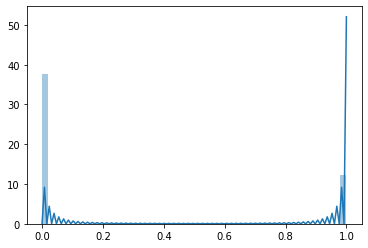

In [108]:
#Univariate Distribution Wine Types 
wine_type = pd.DataFrame(wines, columns=["winetype"])
sns.distplot(wine_type)

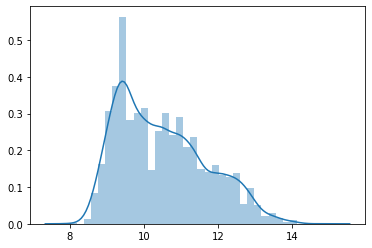

In [109]:
#Univariate Distribution: Alcohol Content by Percentage 
alcohol = pd.DataFrame(wines, columns=["alcohol"])
sns.distplot(alcohol)

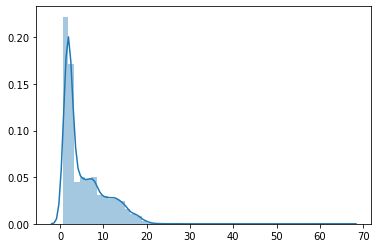

In [110]:
#Univariate Distribution: Sugar Content
sugar = pd.DataFrame(wines, columns=["residual sugar"])
sns.distplot(sugar)

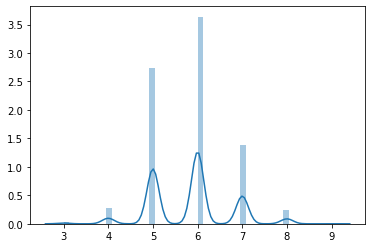

In [111]:
#Univariate Distribution: Quality Rating 
quality = pd.DataFrame(wines, columns=["quality"])
sns.distplot(quality)

### 2.2 Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?

In [112]:
y = wines['winetype']
X = wines.loc[:, wines.columns!="winetype"]


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [114]:
#from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### KNN for Classification w/ Non-Scaled Data

In [115]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print("accuracy: {:.2f}".format(knn.score(X_test, y_test)))

y_pred = knn.predict(X_test) # y_pred includes your predictions

accuracy: 0.94


#### KNN for Classification w/ Scaled Data

In [116]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

print("accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))

y_pred = knn.predict(X_test_scaled) 

accuracy: 0.99


 We see that for KNN Classification, scaling the data has made produced a model that has stronger predictive power, with classification accuracy increasing from 0.94 to 0.99.

#### Cross Validation for KNN Classification

In [118]:
print("KFold:\n{}".format(
cross_val_score(KNeighborsClassifier(), X, y, cv=kfold).mean()))

print("StratifiedKFold:\n{}".format(
cross_val_score(KNeighborsClassifier(n_neighbors=5), X, y, cv=skfold).mean()))

print("RepeatedKFold:\n{}".format(
cross_val_score(KNeighborsClassifier(n_neighbors=5), X, y, cv=rkf).mean()))


KFold:
0.9089049564753953
StratifiedKFold:
0.9435133419704602
RepeatedKFold:
0.942158429561201


 We see that when cross validating, using a variety of different approaches, we are still receiving measure that show strong classification abilities with all means being greater than 0.9.

### Logistic Regression 

In [119]:
from sklearn.linear_model import LogisticRegression


#### Logistic Regression w/ Non-Scaled Data 

In [120]:
logreg = LogisticRegression(C=1e90).fit(X_train, y_train)

In [121]:
import statsmodels.api as sm

X_train_new = sm.add_constant(X_train)  

model = sm.GLM(y_train, X_train_new, family=sm.families.Binomial()).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               winetype   No. Observations:                 4872
Model:                            GLM   Df Residuals:                     4859
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -168.26
Date:                Mon, 02 Mar 2020   Deviance:                       336.53
Time:                        13:03:59   Pearson chi2:                 1.16e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1643.1565    205.302     -8.004      0.000   -2045.540   -1240.773
fixed acidity           -0.0882      0.264     -0.334      0.739      -0.606       0.430
volatile acidity         7.6527      1.254      6.103      0.000       5.195      10.110
citric acid             -2.0395      1.281     -1.592      0.111      -4.551       0.472
residual sugar          -0.9643      0.115     -8.416      0.000      -1.189      -0.740
chlorides               21.0194      4.453      4.720      0.000      12.292      29.747
free sulfur dioxide      0.0675      0.015      4.442      0.000       0.038       0.097
total sulfur dioxide    -0.0512      0.006     -9.183      0.000      -0.062      -0.040
density               1636.5619    209.430      7.814      0.000    1226.086    2047.038
pH                      -0.8112      1.597     -0.508      0.612      -3.942       2.319
sulphates                3.1885      1.420      2.245      0.025       0.405       5.972
alcohol                  1.5839      0.306      5.177      0.000       0.984       2.184
quality                  0.3365      0.218      1.542      0.123      -0.091       0.764
========================================================================================
"""

In [129]:
print("Training Pseudo R^2: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test Pseudo R^2: {:.3f}".format(logreg.score(X_test, y_test)))

Training Pseudo R^2: 0.989
Test Pseudo R^2: 0.988


#### Logistic Regression w/ Scaled Data 

In [125]:
logregsc = LogisticRegression(C=1e90).fit(X_train_scaled, y_train)

In [126]:
X_train_new = sm.add_constant(X_train_scaled) #adding a column of 1s to the matrix 

model = sm.GLM(y_train, X_train_new, family=sm.families.Binomial()).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               winetype   No. Observations:                 4872
Model:                            GLM   Df Residuals:                     4859
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -168.26
Date:                Mon, 02 Mar 2020   Deviance:                       336.53
Time:                        13:07:06   Pearson chi2:                 1.16e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.2940      0.332    -12.921      0.000      -4.945      -3.643
x1            -0.1133      0.340     -0.334      0.739      -0.779       0.552
x2             1.2588      0.206      6.103      0.000       0.855       1.663
x3            -0.2957      0.186     -1.592      0.111      -0.660       0.068
x4            -4.6024      0.547     -8.416      0.000      -5.674      -3.531
x5             0.7126      0.151      4.720      0.000       0.417       1.009
x6             1.2129      0.273      4.442      0.000       0.678       1.748
x7            -2.8843      0.314     -9.183      0.000      -3.500      -2.269
x8             4.9373      0.632      7.814      0.000       3.699       6.176
x9            -0.1304      0.257     -0.508      0.612      -0.634       0.373
x10            0.4657      0.207      2.245      0.025       0.059       0.872
x11            1.8882      0.365      5.177      0.000       1.173       2.603
x12            0.2923      0.190      1.542      0.123      -0.079       0.664
==============================================================================
"""

In [128]:
print("Training Pseudo R^2: {:.3f}".format(logregsc.score(X_train_scaled, y_train)))
print("Test Pseudo R^2: {:.3f}".format(logregsc.score(X_test_scaled, y_test)))

Training Pseudo R^2: 0.994
Test Pseudo R^2: 0.995


 We can see that for logistic regression scaling the data has produced a model that has slightly increased explanatory power, with the independent variables being able to explain 99% of the variation in y. Our previous model could explain just under 99%.  

#### Logistic Regression Cross Validation

In [130]:
print("KFold:\n{}".format(
cross_val_score(LogisticRegression(C=1e90), X, y, cv=kfold).mean()))

print("StratifiedKFold:\n{}".format(
cross_val_score(LogisticRegression(C=1e90), X, y, cv=skfold).mean()))

print("RepeatedKFold:\n{}".format(
cross_val_score(LogisticRegression(C=1e90), X, y, cv=rkf).mean()))


KFold:
0.981072777876473
StratifiedKFold:
0.9881478036322833
RepeatedKFold:
0.9883638064783561


 We see that when cross validating, using a variety of different approaches, we are still receiving measure that show strong predicative abilities with all means being greater than 0.98.

### Penalized Logistic Regression

#### Penalized Logistic Regression w/ Non-Scaled Data

In [131]:
lgr1 = LogisticRegression(C=1e90, penalty = 'l1').fit(X_train, y_train)

In [132]:
print("Training Pseudo R^2: {:.3f}".format(lgr1.score(X_train, y_train)))
print("Test Pseudo R^2: {:.3f}".format(lgr1.score(X_test, y_test)))

Training Pseudo R^2: 0.989
Test Pseudo R^2: 0.985


In [150]:
lgr2 = LogisticRegression(C=1e90, penalty = 'l2').fit(X_train, y_train)

In [151]:
print("Training Pseudo R^2: {:.3f}".format(lgr2.score(X_train, y_train)))
print("Test Pseudo R^2: {:.3f}".format(lgr2.score(X_test, y_test)))

Training Pseudo R^2: 0.989
Test Pseudo R^2: 0.988


#### Penalized Logistic Regression w/ Scaled Data

In [152]:
lgr1 = LogisticRegression(C=1e90, penalty = 'l1').fit(X_train_scaled, y_train)

In [153]:
print("Training Pseudo R^2: {:.3f}".format(lgr1.score(X_train_scaled, y_train)))
print("Test Pseudo R^2: {:.3f}".format(lgr1.score(X_test_scaled, y_test)))

Training Pseudo R^2: 0.994
Test Pseudo R^2: 0.995


In [155]:
lgr2 = LogisticRegression(C=1e90, penalty = 'l2').fit(X_train_scaled, y_train)

In [156]:
print("Training Pseudo R^2: {:.3f}".format(lgr2.score(X_train_scaled, y_train)))
print("Test Pseudo R^2: {:.3f}".format(lgr2.score(X_test_scaled, y_test)))

Training Pseudo R^2: 0.994
Test Pseudo R^2: 0.995


We can see that for penalized logistic regression scaling the data has produced a model that has slightly increased explanatory power, with the independent variables being able to explain 99% of the variation in y. Our previous model could explain just under 99%.  

#### Penalized Logistic Regression Cross Validation (l1 Penalty)

In [139]:
print("KFold:\n{}".format(
cross_val_score(LogisticRegression(C=1e90,penalty="l1"), X, y, cv=kfold).mean()))

print("StratifiedKFold:\n{}".format(
cross_val_score(LogisticRegression(C=1e90,penalty="l1"), X, y, cv=skfold).mean()))

print("RepeatedKFold:\n{}".format(
cross_val_score(LogisticRegression(C=1e90,penalty="l1"), X, y, cv=rkf).mean()))


KFold:
0.9807650855687807
StratifiedKFold:
0.9870704062707037
RepeatedKFold:
0.9879790963463019


#### Penalized Logistic Regression Cross Validation (l2 Penalty)

In [140]:
print("KFold:\n{}".format(
cross_val_score(LogisticRegression(C=1e90,penalty="l2"), X, y, cv=kfold).mean()))

print("StratifiedKFold:\n{}".format(
cross_val_score(LogisticRegression(C=1e90,penalty="l2"), X, y, cv=skfold).mean()))

print("RepeatedKFold:\n{}".format(
cross_val_score(LogisticRegression(C=1e90,penalty="l2"), X, y, cv=rkf).mean()))


KFold:
0.981072777876473
StratifiedKFold:
0.9878404657150497
RepeatedKFold:
0.9882564576301297


 We see that when accounting for penalty, cross validating, using a variety of different approaches, we are still receiving measure that show strong predicative abilities with all means being greater than 0.98.

### 2.3 Tune the parameters where possible using GridSearchCV. Do the results improve?

#### Logistic Regression w/ GridSearch CV 

In [178]:
lgr = LogisticRegression()

penalty = ['l1', 'l2']


C = np.logspace(0, 4, 10)


hyperparameters = dict(C=C, penalty=penalty)

#### Logistic Regression w/ GridSearch CV Non-Scaled Data 

In [142]:
#grid = GridSearchCV(lgr, param_grid, cv=10, scoring = 'accuracy', )
grid = GridSearchCV(lgr, param_grid=hyperparameters, cv=10)
grid_sc = GridSearchCV(lgr, param_grid=hyperparameters, cv=10)

In [143]:
grid.fit(X_train, y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
  

In [144]:
print("Pseudo R^2: {:.3f}".format(grid.score(X_test, y_test)))
print('Best Penalty:', grid.best_estimator_.get_params()['penalty'])
print('Best C:', grid.best_estimator_.get_params()['C'])

test-set score: 0.986
Best Penalty: l2
Best C: 59.94842503189409


In [145]:
print("KFold:\n{}".format(
cross_val_score(LogisticRegression(C=59.94842503189409,penalty="l2"), X, y, cv=kfold).mean()))

print("StratifiedKFold:\n{}".format(
cross_val_score(LogisticRegression(C=59.94842503189409,penalty="l2"), X, y, cv=skfold).mean()))

print("RepeatedKFold:\n{}".format(
cross_val_score(LogisticRegression(C=59.94842503189409,penalty="l2"), X, y, cv=rkf).mean()))



KFold:
0.974611120980636
StratifiedKFold:
0.9879953786900199
RepeatedKFold:
0.9878561141706639


#### Logistic Regression w/ GridSearch CV w/ Scaled Data 

In [146]:
grid_sc.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
  

In [157]:
print("Pseudo R^2: {:.3f}".format(grid_sc.score(X_test_scaled, y_test)))
print('Best Penalty:', grid_sc.best_estimator_.get_params()['penalty'])
print('Best C:', grid_sc.best_estimator_.get_params()['C'])

Pseudo R^2: 0.995
Best Penalty: l1
Best C: 7.742636826811269


In [158]:
print("KFold:\n{}".format(
cross_val_score(LogisticRegression(C=7.742636826811269,penalty="l1"), X, y, cv=kfold).mean()))

print("StratifiedKFold:\n{}".format(
cross_val_score(LogisticRegression(C=7.742636826811269,penalty="l1"), X, y, cv=skfold).mean()))

print("RepeatedKFold:\n{}".format(
cross_val_score(LogisticRegression(C=7.742636826811269,penalty="l1"), X, y, cv=rkf).mean()))



KFold:
0.9792262687274235
StratifiedKFold:
0.9878401105946415
RepeatedKFold:
0.9878560904838042


 Having performed GridSearch with respect to both penalty type and C value we were able to discover the best approach for logistic regressions with both scaled and not scaled data. The models we discovered, whose ability to predict, can be measured using the pseudo R^2 term predict similarly to previous models but has shown a slight improvement

### 2.4 Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change? Do they change if you change the random seed of the shuffling? Or if you change the random state of the split into training and test data?



#### KFold w/ Shuffle False 

In [159]:
grid = GridSearchCV(lgr, param_grid=hyperparameters, cv=KFold(shuffle=False, random_state=124238920380932))
grid_sc = GridSearchCV(lgr, param_grid=hyperparameters, cv=KFold(shuffle=False, random_state=124238920380932))

In [160]:
grid.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=3, random_state=124238920380932, shuffle=False),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
     

In [161]:
print("Pseudo R^2: {:.3f}".format(grid.score(X_test, y_test)))
print('Best Penalty:', grid.best_estimator_.get_params()['penalty'])
print('Best C:', grid.best_estimator_.get_params()['C'])

Pseudo R^2: 0.988
Best Penalty: l1
Best C: 166.81005372000593


In [162]:
grid_sc.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=124238920380932, shuffle=False),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
     

In [163]:
print("Pseudo R^2: {:.3f}".format(grid_sc.score(X_test_scaled, y_test)))
print('Best Penalty:', grid_sc.best_estimator_.get_params()['penalty'])
print('Best C:', grid_sc.best_estimator_.get_params()['C'])



Pseudo R^2: 0.994
Best Penalty: l1
Best C: 2.7825594022071245


#### KFold w/ Shuffle True 

In [164]:
grid = GridSearchCV(lgr, param_grid=hyperparameters, cv=KFold(shuffle=True, random_state=1242389203))
grid_sc = GridSearchCV(lgr, param_grid=hyperparameters, cv=KFold(shuffle=True, random_state=1242389203))

In [165]:
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=1242389203, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
           

In [166]:
print("Pseudo R^2: {:.3f}".format(grid.score(X_test, y_test)))
print('Best Penalty:', grid.best_estimator_.get_params()['penalty'])
print('Best C:', grid.best_estimator_.get_params()['C'])

Pseudo R^2: 0.987
Best Penalty: l2
Best C: 1291.5496650148827


In [167]:
grid_sc.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=1242389203, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
           

In [168]:
print("Pseudo R^2: {:.3f}".format(grid_sc.score(X_test_scaled, y_test)))
print('Best Penalty:', grid_sc.best_estimator_.get_params()['penalty'])
print('Best C:', grid_sc.best_estimator_.get_params()['C'])

Pseudo R^2: 0.994
Best Penalty: l2
Best C: 2.7825594022071245


#### KFold w/ New Seed 

In [169]:
grid = GridSearchCV(lgr, param_grid=hyperparameters, cv=KFold(shuffle=True, random_state=45))
grid_sc = GridSearchCV(lgr, param_grid=hyperparameters, cv=KFold(shuffle=True, random_state=45))

In [170]:
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=45, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             pre_di

In [171]:
print("Pseudo R^2: {:.3f}".format(grid.score(X_test, y_test)))
print('Best Penalty:', grid.best_estimator_.get_params()['penalty'])
print('Best C:', grid.best_estimator_.get_params()['C'])

Pseudo R^2: 0.987
Best Penalty: l2
Best C: 464.15888336127773


In [172]:
grid_sc.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=45, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             pre_di

In [173]:
print("Pseudo R^2: {:.3f}".format(grid_sc.score(X_test_scaled, y_test)))
print('Best Penalty:', grid_sc.best_estimator_.get_params()['penalty'])
print('Best C:', grid_sc.best_estimator_.get_params()['C'])

Pseudo R^2: 0.995
Best Penalty: l1
Best C: 1.0


#### KFold w/ New Seed and Shuffle off

In [174]:
grid = GridSearchCV(lgr, param_grid=hyperparameters, cv=KFold(shuffle=False, random_state=45))
grid_sc = GridSearchCV(lgr, param_grid=hyperparameters, cv=KFold(shuffle=False, random_state=45))

In [175]:
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=45, shuffle=False),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             pre_d

In [473]:
print("Pseudo R^2: {:.3f}".format(grid.score(X_test, y_test)))
print('Best Penalty:', grid.best_estimator_.get_params()['penalty'])
print('Best C:', grid.best_estimator_.get_params()['C'])

test-set score: 0.985
Best Penalty: l1
Best C: 21.544346900318832


In [176]:
grid_sc.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=45, shuffle=False),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             pre_d

In [177]:
print("Pseudo R^2: {:.3f}".format(grid_sc.score(X_test_scaled, y_test)))
print('Best Penalty:', grid_sc.best_estimator_.get_params()['penalty'])
print('Best C:', grid_sc.best_estimator_.get_params()['C'])

Pseudo R^2: 0.994
Best Penalty: l1
Best C: 2.7825594022071245


R^2

Not Scaled, Scaled
1. KFold w/ Shuffle False -> .989,.994
2. KFold w/ Shuffle True -> .987, .994
3. KFold w/ New Seed -> .987,.995
4. KFold w/ New Seed and Shuffle off -> .995, .994

We see that with this data there does not seem to be much change in explanatory power given the adjustments of the see and shuffling. The odd one out of the bunch appears to be 4. which is the only rendition where the not scaled data performed better than the scaled, however the difference is minimal.

### 2.5 Lastly, compare the coefficients for Logistic Regression and Penalized Logistic Regression and discuss which final model you would choose to predict new data.

In [179]:
print(lgr1.score(X_test, y_test))
print(lgr1.coef_)

0.7366153846153846
[[-0.10555434  1.26078425 -0.29515375 -4.58857718  0.71340921  1.21073104
  -2.88390237  4.91817648 -0.12439965  0.46839067  1.8779795   0.29223981]]


In [180]:
print(lgr2.score(X_test, y_test))
print(lgr2.coef_)

0.7366153846153846
[[-0.11178505  1.25809256 -0.29652698 -4.59653572  0.71280629  1.21350348
  -2.88391744  4.93460978 -0.13016557  0.46576363  1.88780997  0.29192203]]


In [181]:
print(logreg.score(X_test, y_test))
print(logreg.coef_)

0.9876923076923076
[[ 1.41487490e+00  1.17570208e+01 -8.64211847e-01 -1.13141558e-01
   3.19822777e+01  5.31743334e-02 -6.25925503e-02 -1.99751713e+01
   8.91778445e+00  8.59114984e+00 -3.20166513e-01  2.14757181e-03]]


 I would be inclined to use the penalized logistic regressions in this case because seldom is a model found with a R^2 so near to 1 that has no underlying issues. Multicollinearity may be at play in the non-penalized logistic regression, and this could be inspiring an artificially high R^2 value, because of this, I would inclined to reference the penalized models, as they account for multicollinarity, and have R^2 values that suggest that there may be additional features that could explain some of the variation in y, which is are more likely occurrence then having found all the independent features (x) that can explain the variation of the dependent variable (y).